In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
%matplotlib inline

import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt

from scipy import interp
from itertools import cycle

from sklearn import svm
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Read the input file and check the data dimension

In [0]:
from google.colab import drive
drive.mount('/content/drive') 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

data = pd.read_csv('/content/drive/My Drive/8sept/assignment/german_credit.csv')


In [0]:
data

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,none,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,none,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,none,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,none,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
data_account_check_status = pd.get_dummies(data['account_check_status'])
data_savings = pd.get_dummies(data['savings'])



In [0]:
data_present_emp_since = pd.get_dummies(data['present_emp_since'])

data_credit_history = pd.get_dummies(data['credit_history'])
data_personal_status_sex = pd.get_dummies(data['personal_status_sex'])
data_property = pd.get_dummies(data['property'])



In [0]:
data_concat = pd.concat([data, data_account_check_status, data_savings,  data_present_emp_since ,  data_credit_history ,  data_personal_status_sex ,  data_property ], axis=1)
print (data_concat.head())

   default account_check_status  ...  real estate unknown / no property
0        0               < 0 DM  ...            1                     0
1        1    0 <= ... < 200 DM  ...            1                     0
2        0  no checking account  ...            1                     0
3        0               < 0 DM  ...            0                     0
4        1               < 0 DM  ...            0                     1

[5 rows x 48 columns]


In [0]:
data_concat.drop(['account_check_status', 'savings','present_emp_since' , 'credit_history','personal_status_sex','property'], inplace=True, axis=1)
print (data_concat.head())

   default  duration_in_month  ... real estate  unknown / no property
0        0                  6  ...           1                      0
1        1                 48  ...           1                      0
2        0                 12  ...           1                      0
3        0                 42  ...           0                      0
4        1                 24  ...           0                      1

[5 rows x 42 columns]


In [0]:
data_concat.drop(['other_debtors', ], inplace=True, axis=1)

In [0]:
data_concat

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,0 <= ... < 200 DM,< 0 DM,>= 200 DM / salary assignments for at least 1 year,no checking account,.. >= 1000 DM,... < 100 DM,100 <= ... < 500 DM,500 <= ... < 1000 DM,unknown/ no savings account,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed,all credits at this bank paid back duly,critical account/ other credits existing (not at this bank),delay in paying off in the past,existing credits paid back duly till now,no credits taken/ all credits paid back duly,female : divorced/separated/married,male : divorced/separated,male : married/widowed,male : single,if not A121 : building society savings agreement/ life insurance,"if not A121/A122 : car or other, not in attribute 6",real estate,unknown / no property
0,0,6,1169,4,4,67,2,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,1,48,5951,2,2,22,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,0,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,42,7882,2,4,45,1,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,1,24,4870,3,4,53,2,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
5,0,36,9055,2,4,35,1,2,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
6,0,24,2835,3,4,53,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
7,0,36,6948,2,2,35,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
8,0,12,3059,2,4,61,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
9,1,30,5234,4,2,28,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [0]:
# Print Shape of model data

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [0]:
data_concat.corr().transpose()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,0 <= ... < 200 DM,< 0 DM,>= 200 DM / salary assignments for at least 1 year,no checking account,.. >= 1000 DM,... < 100 DM,100 <= ... < 500 DM,500 <= ... < 1000 DM,unknown/ no savings account,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed,all credits at this bank paid back duly,critical account/ other credits existing (not at this bank),delay in paying off in the past,existing credits paid back duly till now,no credits taken/ all credits paid back duly,female : divorced/separated/married,male : divorced/separated,male : married/widowed,male : single,if not A121 : building society savings agreement/ life insurance,"if not A121/A122 : car or other, not in attribute 6",real estate,unknown / no property
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,-0.044009,-0.322436,-0.085749,0.161007,0.022255,-0.070954,-0.129238,-0.059733,0.106397,0.010603,-0.075980,0.039815,0.134448,-0.181713,0.012325,0.043722,1.447665e-01,0.075493,5.006262e-02,-0.019630,-0.080677,0.007238,0.011121,-0.119300,0.125750
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,-0.076455,-0.063467,-0.048261,-0.047228,0.051587,-0.040257,0.071185,0.017471,-0.056792,-0.031920,0.079635,-0.005156,0.033728,-0.075575,0.136927,-0.069751,1.180768e-01,-0.081432,6.414543e-03,-0.084418,0.121889,-0.056706,0.119486,-0.242586,0.212838
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,-0.100510,-0.039485,-0.055542,-0.036443,0.013546,-0.064256,0.106546,-0.009619,-0.051502,-0.037052,0.053755,0.086159,0.005923,-0.041807,0.113552,-0.086682,1.471910e-01,-0.093482,3.361899e-02,-0.138289,0.152458,-0.032556,0.075679,-0.248338,0.248922
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,-0.041591,0.024961,0.034708,-0.008626,-0.015356,-0.023186,0.018367,0.133371,-0.034021,-0.069614,-0.000712,-0.049420,0.030339,0.041089,-0.014597,-0.020947,-5.440121e-02,-0.086302,-9.704703e-02,0.007686,0.118233,-0.020628,0.017023,-0.034555,0.044990
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,-0.064303,0.001985,-0.002375,-0.089921,0.017789,0.032702,0.080564,0.302796,-0.164155,-0.140663,-0.031156,0.036123,0.027694,0.088460,-0.020351,-0.081458,9.251743e-04,0.013818,-3.847283e-02,-0.102684,0.063639,-0.023708,-0.041462,-0.085194,0.188028
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,0.037504,0.062436,0.032007,-0.044084,-0.075302,0.030988,0.077811,0.362520,-0.209967,-0.154975,-0.083520,0.110562,0.014360,0.163681,0.016129,-0.155848,-2.236971e-02,-0.161694,6.242973e-02,-0.145529,0.207434,-0.028686,-0.143485,0.011538,0.206368
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,-0.040213,0.094435,0.036169,0.033909,-0.010946,-0.061599,-0.015593,0.123622,-0.096399,-0.073079,0.037380,0.012684,-0.095824,0.501364,0.141742,-0.540354,1.124270e-01,-0.094260,-2.662239e-02,-0.032623,0.118198,-0.009946,0.010577,0.008568,-0.012850
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,-0.008700,0.010914,-0.005687,-0.019568,0.000318,-0.008700,0.033122,0.081262,-0.048764,-0.032367,0.022084,-0.041363,0.069185,0.021765,0.042526,-0.078339,1.128055e-02,-0.203431,-6.022164e-02,-0.117209,0.283483,-0.006284,-0.073108,0.020203,0.077548
0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,-0.157296,-0.489136,0.011478,-0.047045,0.143136,-0.055198,-0.024652,-0.067731,0.082058,-0.029493,-0.004794,0.059118,0.019002,-0.118007,0.090174,0.015498,8.331786e-02,0.012

### Drop the original variables which are converted to dummy

In [0]:
data_concat.drop(['account_check_status', 'savings','present_emp_since' , 'credit_history','personal_status_sex','property'], inplace=True, axis=1)

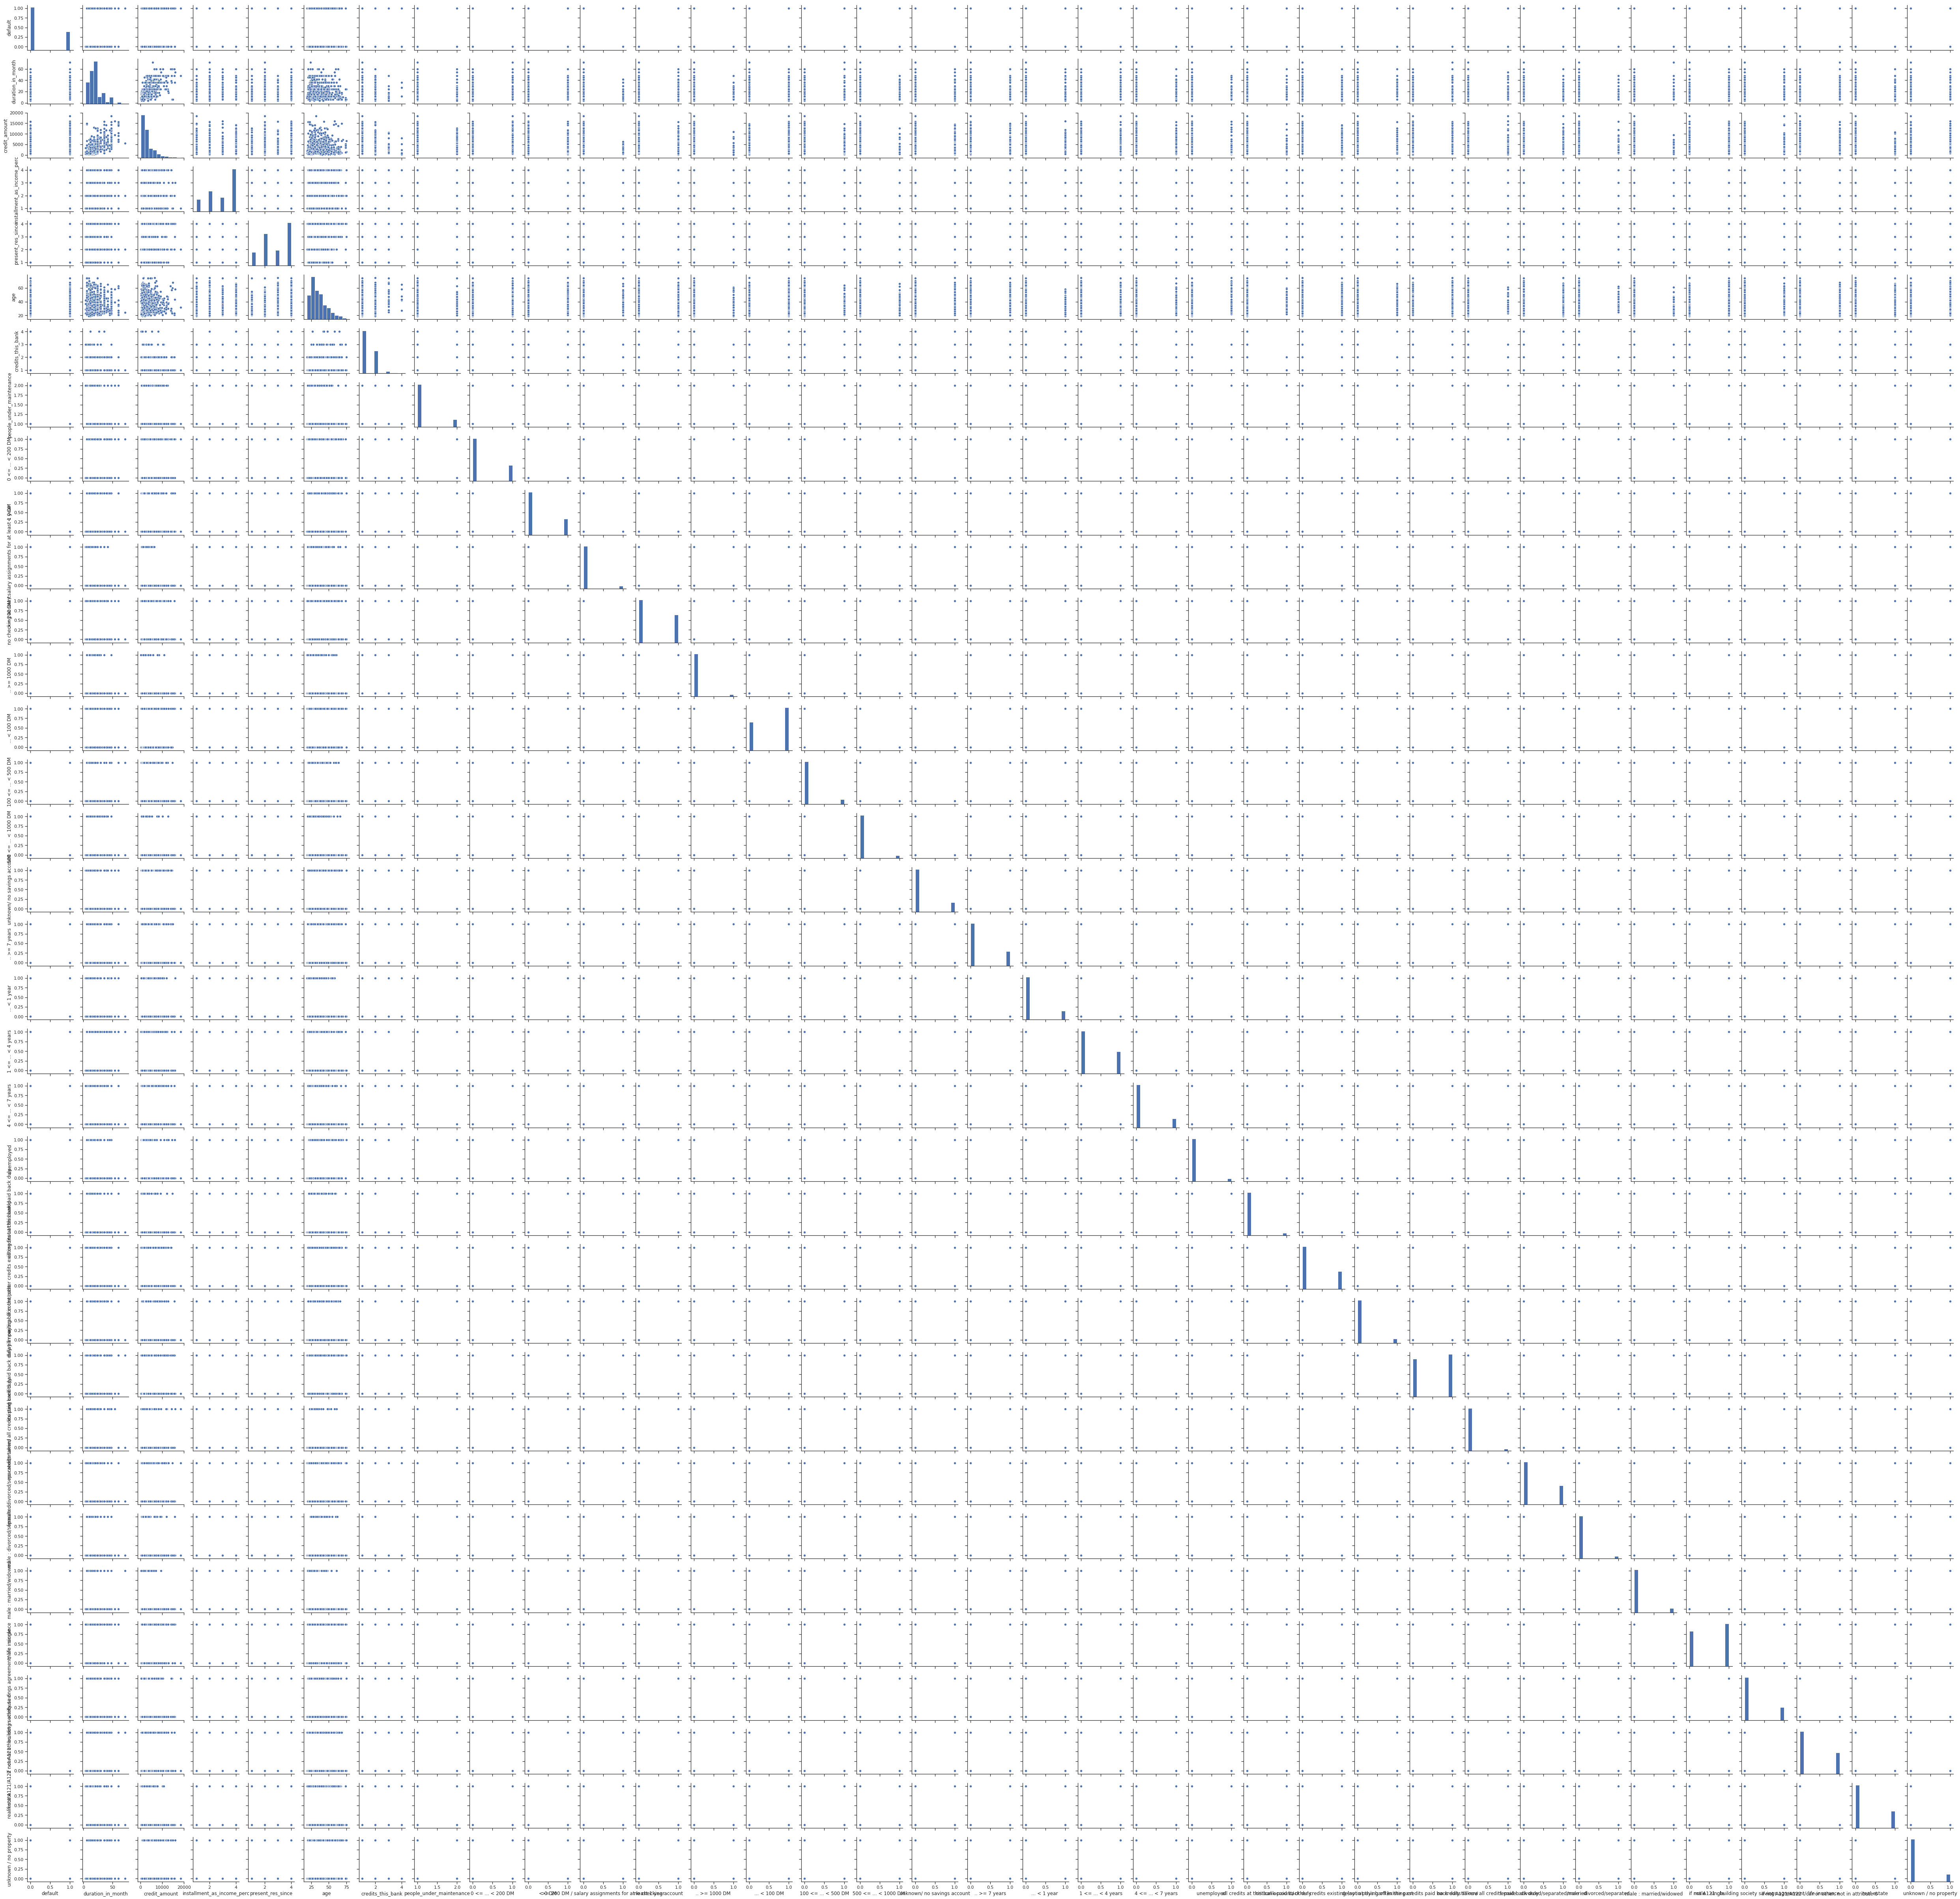

In [0]:
sns.pairplot(data_concat)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_concat.drop(['< 0 DM' ,'no checking account'], axis=1), test_size=0.3 , random_state=53)

In [0]:
train_set.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,0 <= ... < 200 DM,>= 200 DM / salary assignments for at least 1 year,.. >= 1000 DM,... < 100 DM,100 <= ... < 500 DM,500 <= ... < 1000 DM,unknown/ no savings account,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed,all credits at this bank paid back duly,critical account/ other credits existing (not at this bank),delay in paying off in the past,existing credits paid back duly till now,no credits taken/ all credits paid back duly,female : divorced/separated/married,male : divorced/separated,male : married/widowed,male : single,if not A121 : building society savings agreement/ life insurance,"if not A121/A122 : car or other, not in attribute 6",real estate,unknown / no property
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000
mean,0.301429,21.195714,3231.560000,2.970000,2.855714,35.488571,1.382857,1.155714,0.274286,0.065714,0.041429,0.604286,0.104286,0.067143,0.182857,0.247143,0.165714,0.337143,0.181429,0.068571,0.051429,0.281429,0.100000,0.534286,0.032857,0.32000,0.051429,0.095714,0.532857,0.227143,0.340000,0.28000,0.152857
std,0.459207,12.273247,2746.611572,1.123535,1.104308,11.515798,0.555109,0.362844,0.446473,0.247959,0.199422,0.489353,0.305849,0.250448,0.386826,0.431659,0.372090,0.473072,0.385648,0.252905,0.221028,0.450018,0.300215,0.499180,0.178390,0.46681,0.221028,0.294409,0.499276,0.419285,0.474047,0.44932,0.360107
min,0.000000,4.000000,276.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,12.000000,1363.250000,2.000000,2.000000,26.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,18.000000,2300.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,24.000000,3959.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [0]:
test_set.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,0 <= ... < 200 DM,>= 200 DM / salary assignments for at least 1 year,.. >= 1000 DM,... < 100 DM,100 <= ... < 500 DM,500 <= ... < 1000 DM,unknown/ no savings account,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed,all credits at this bank paid back duly,critical account/ other credits existing (not at this bank),delay in paying off in the past,existing credits paid back duly till now,no credits taken/ all credits paid back duly,female : divorced/separated/married,male : divorced/separated,male : married/widowed,male : single,if not A121 : building society savings agreement/ life insurance,"if not A121/A122 : car or other, not in attribute 6",real estate,unknown / no property
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.296667,20.220000,3363.886667,2.980000,2.820000,35.68000,1.463333,1.153333,0.256667,0.056667,0.063333,0.600000,0.100000,0.053333,0.183333,0.266667,0.186667,0.343333,0.156667,0.046667,0.043333,0.320000,0.060000,0.520000,0.056667,0.286667,0.046667,0.083333,0.583333,0.243333,0.313333,0.286667,0.156667
std,0.457552,11.534082,2995.553975,1.109219,1.103779,11.05887,0.624464,0.360911,0.437524,0.231591,0.243968,0.490716,0.300501,0.225073,0.387586,0.442956,0.390295,0.475615,0.364094,0.211276,0.203947,0.467256,0.237884,0.500435,0.231591,0.452960,0.211276,0.276847,0.493830,0.429812,0.464624,0.452960,0.364094
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1385.000000,2.000000,2.000000,27.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,18.000000,2340.500000,3.000000,3.000000,33.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,24.000000,4157.000000,4.000000,4.000000,42.00000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,60.000000,15945.000000,4.000000,4.000000,75.00000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("default")
test_labels = test_set.pop("default")

In [0]:
randomforest_model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy", random_state=9999)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

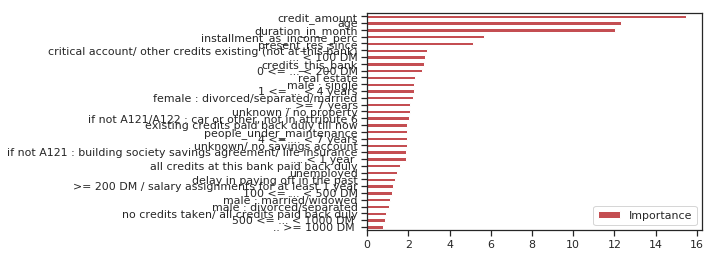

In [0]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [0]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pydotplus 

from IPython.display import Image  
from collections import defaultdict
from sklearn.dummy import DummyClassifier
from sklearn import svm, tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression, SGDClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc


### Q6 Show the list of the features importance( 1 Marks)

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [0]:
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

In [0]:
# Calculate score standard deviation using std()

# Q8 Print the confusion matrix( 1 Marks)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: ignored

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  nan
Standard deviation:  nan
